In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv('./files/bank_dataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h2>lets drop columns which we do not need<h2>

In [3]:
df1 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df1['EstimatedSalary'].sort_values().head()

2362     11.58
9647     90.07
9010     91.75
5548     96.27
4989    106.67
Name: EstimatedSalary, dtype: float64

In [13]:
df1['EstimatedSalary'].sort_values(ascending=False).head()

6646    199992.48
3580    199970.74
4417    199953.33
9096    199929.17
8926    199909.32
Name: EstimatedSalary, dtype: float64

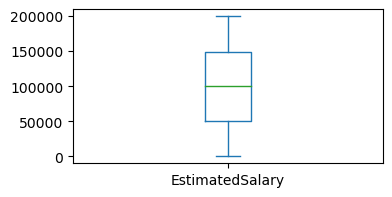

In [21]:
df1['EstimatedSalary'].plot(kind='box' , figsize=(4, 2))
plt.show()

<h3> There are not outlayers but Some one must have at least have a salary of $100 if he opens a bank account</h3>

In [22]:
filt = df1['EstimatedSalary'] > 100

df2 = df1[filt]
df2.shape

(9996, 11)

# lets if all the column have any impact on our result

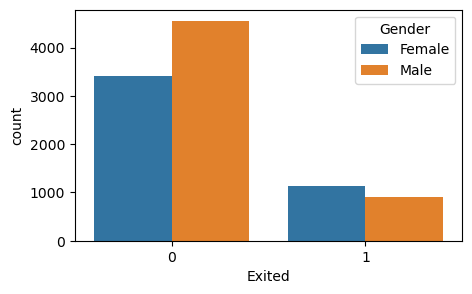

In [24]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df2, x='Exited', hue='Gender')
plt.show()

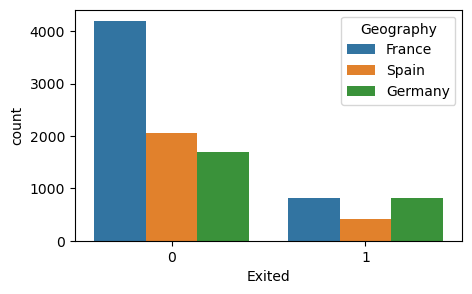

In [25]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df2, x='Exited', hue='Geography')
plt.show()

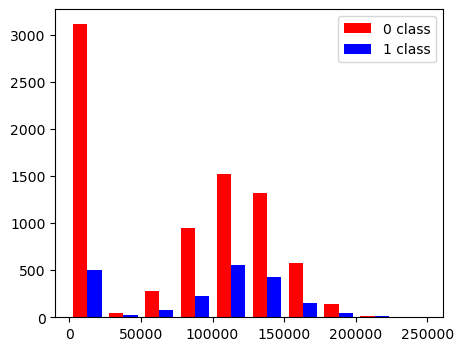

In [28]:
class_0 = df2[df2['Exited'] == 0]
class_1 = df2[df2['Exited'] == 1]
plt.figure(figsize=(5, 4))
plt.hist([class_0['Balance'], class_1['Balance']], label=['0 class', '1 class'], color=['red', 'blue'])
plt.legend()
plt.show()

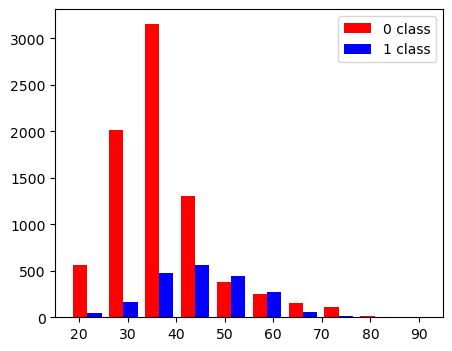

In [34]:
class_0 = df2[df2['Exited'] == 0]
class_1 = df2[df2['Exited'] == 1]
plt.figure(figsize=(5, 4))
plt.hist([class_0['Age'], class_1['Age']], label=['0 class', '1 class'], color=['red', 'blue'])
plt.legend()
plt.show()

<h2> It seems gender does not impact if some one would stay or not</h2>

In [29]:
df3 = df2.drop('Gender', axis=1)

<h2>lets one hot encode the geography column<h2>

In [30]:
dummy_df = pd.get_dummies(df3['Geography'], drop_first=True)

df4 = pd.concat([df3, dummy_df], axis=1).drop('Geography', axis=1)
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [36]:
scaler = MinMaxScaler()

df4[['CreditScore','Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(
    df4[['CreditScore','Age', 'Balance', 'EstimatedSalary']]
)

In [37]:
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,0.324324,2,0.000000,1,1,1,0.506500,1,0,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562501,0,0,1
2,0.304,0.324324,8,0.636357,3,1,0,0.569450,1,0,0
3,0.698,0.283784,1,0.000000,2,0,0,0.468867,0,0,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395113,0,0,1


<h2> Lets save the dataset first</h2>

In [38]:
df4.to_csv('./files/cleaned_bank_dataset.csv', index=False)

In [39]:
x = df4.drop("Exited", axis=1)
y = df4['Exited']

In [57]:
x.shape

(9996, 10)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=15, test_size=0.2)

In [55]:
y_train.value_counts()

0    6387
1    1609
Name: Exited, dtype: int64

In [58]:
def get_model():
    model = keras.Sequential([
        keras.layers.Dense(1500, input_shape=(10, ), activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [59]:
model = get_model()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
print()
y_pred = np.round(model.predict(x_test))
print(classification_report(y_test, y_pred))

Epoch 1/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.8019
Epoch 2/5
250/250 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8195
Epoch 3/5
250/250 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.8374
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3701 - accuracy: 0.8484
Epoch 5/5
63/63 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8380

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1574
           1       0.69      0.43      0.53       426

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.82      0.84      0.82      2000



In [60]:
# the value of f1 score for 1 class is very low which can solved using many balancing methods